In [2]:
from collections import defaultdict
import os
import sys

PROJ_ROOT = os.path.join(os.pardir)

# add local python functions
sys.path.append(os.path.join(PROJ_ROOT, "src"))

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster import hierarchy
import networkx as nx

In [4]:
%load_ext watermark

In [6]:
%watermark -a "Arya D. McCarthy" -d -t -v -p networkx -g

Arya D. McCarthy 2017-03-07 00:16:53 

CPython 3.5.3
IPython 5.3.0

networkx 1.11
Git hash: 9a2a7f362aa2c544a43425934b1bd131d4f4c9a3


In [18]:
G_ = nx.read_pajek("../data/raw/dolphins.paj")
G = nx.Graph(G_)
G = nx.convert_node_labels_to_integers(G, label_attribute="name")

In [19]:
def create_hc(G):
    """Creates hierarchical cluster of graph from distance matrix.
    
    Parameters
    ----------
    G : nx.Graph
        The graph to cluster.
        
    Returns
    -------
    lst : list
        The partition values.
    """
    path_length = nx.all_pairs_shortest_path_length(G)
    distances = np.zeros((len(G), len(G)))
    for u, p in path_length.items():
        for v, d in p.items():
            distances[u, v] = d
    print(distances)
    # Create hierarchical cluster.
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)
    # This partition selection is arbitrary.
    membership = list(hierarchy.fcluster(Z, t=1.15))
    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n, p in zip(list(range(len(G))), membership):
        partition[p].append(n)
    return list(partition.values())

In [20]:
from sklearn.cluster import DBSCAN

In [40]:
path_length = nx.all_pairs_shortest_path_length(G)
distances = np.zeros((len(G), len(G)))
print(distances)
for (u, p) in path_length.items():
    for (v, d) in p.items():
        distances[u][v] = d

# Create hierarchical cluster.
Y = distance.squareform(distances)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [24]:
distances

array([[ 0.,  4.,  3., ...,  4.,  3.,  3.],
       [ 4.,  0.,  4., ...,  4.,  5.,  2.],
       [ 3.,  4.,  0., ...,  2.,  3.,  3.],
       ..., 
       [ 4.,  4.,  2., ...,  0.,  5.,  3.],
       [ 3.,  5.,  3., ...,  5.,  0.,  4.],
       [ 3.,  2.,  3., ...,  3.,  4.,  0.]])

In [34]:
from scipy.sparse import csr_matrix
distances = csr_matrix(distances)

In [38]:
from scipy.cluster.hierarchy import complete

In [43]:
Z = complete(distances)
Z

array([[  32.        ,   45.        ,    2.64575131,    2.        ],
       [  54.        ,   55.        ,    2.82842712,    2.        ],
       [   8.        ,   18.        ,    2.82842712,    2.        ],
       [  12.        ,   36.        ,    3.31662479,    2.        ],
       [   3.        ,   20.        ,    4.        ,    2.        ],
       [   9.        ,   56.        ,    4.        ,    2.        ],
       [   7.        ,   19.        ,    4.12310563,    2.        ],
       [  35.        ,   66.        ,    4.12310563,    3.        ],
       [  50.        ,   52.        ,    4.12310563,    2.        ],
       [  15.        ,   27.        ,    4.24264069,    2.        ],
       [  37.        ,   44.        ,    4.35889894,    2.        ],
       [  47.        ,   61.        ,    4.47213595,    2.        ],
       [  46.        ,   69.        ,    4.47213595,    4.        ],
       [   2.        ,   13.        ,    4.58257569,    2.        ],
       [  41.        ,   49.      

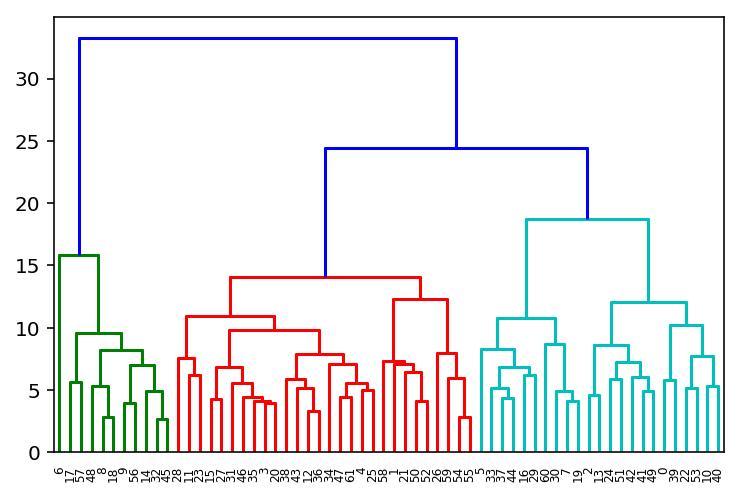

In [45]:
hierarchy.dendrogram(Z)
plt.show()

In [49]:
Z
import pandas as pd
data = pd.DataFrame(Z, columns=['child1', 'child2', 'distance', 'cluster_size'])

In [50]:
data.dtypes

child1          float64
child2          float64
distance        float64
cluster_size    float64
dtype: object

In [51]:
data.describe()

,child1,child2,distance,cluster_size
count,61.000000,61.000000,61.000000,61.000000
mean,48.344262,72.655738,7.573316,6.967213
std,36.301922,30.059322,5.076642,10.595545
min,0.000000,13.000000,2.645751,2.000000
25%,16.000000,52.000000,4.898979,2.000000
50%,41.000000,74.000000,6.082763,3.000000
75%,80.000000,98.000000,8.185353,6.000000
max,119.000000,121.000000,33.241540,62.000000


In [57]:
ffg = nx.convert_node_labels_to_integers(nx.florentine_families_graph(), first_label=1)

In [63]:
%matplotlib inline

In [61]:
%pylab --no-import-all

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/Arya/anaconda/envs/thesis/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Arya/anaconda/envs/thesis/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Arya/anaconda/envs/thesis/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Arya/anaconda/envs/thesis/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

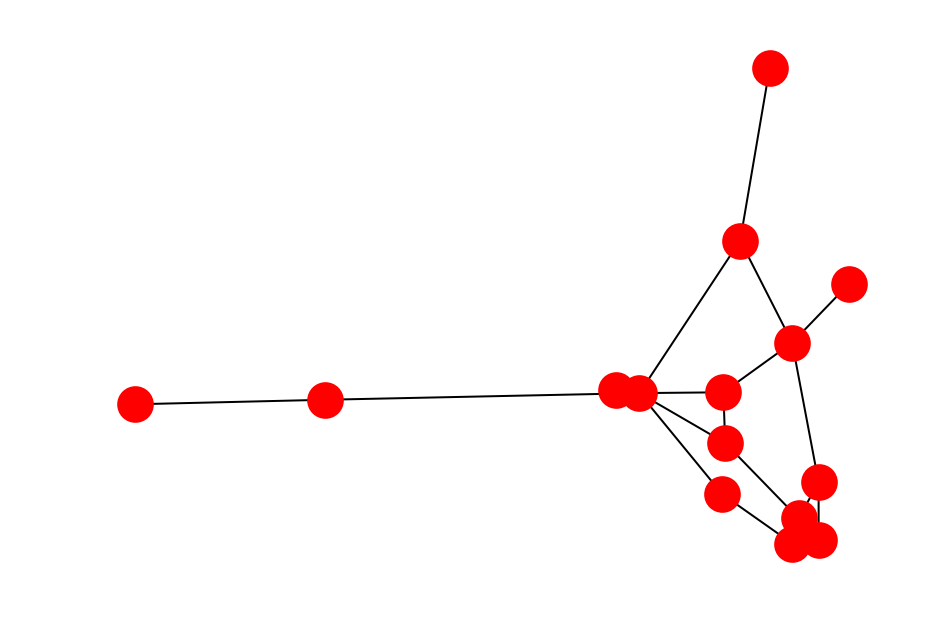

In [72]:
nx.draw_spectral(nx.florentine_families_graph(), iterations=100)